# Check effect of water stress for Valais must samples

In [1]:
#!mkdir /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/valais

In [15]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/valais'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/valais


In [2]:
%env TMPDIR=/scratch/lfloerl/tmpdata

env: TMPDIR=/scratch/lfloerl/tmpdata


In [68]:
from qiime2 import Visualization
import qiime2 as q2
from qiime2 import Visualization
from qiime2 import Artifact
from qiime2 import Metadata
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qiime2.plugins.diversity.visualizers import alpha_group_significance
from qiime2.plugins.composition.visualizers import ancom
from qiime2.plugins.feature_table.methods import filter_features
from qiime2.plugins.composition.methods import add_pseudocount

from qiime2.plugins import diversity as q2d

%matplotlib inline

In [48]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv')
taxonomy = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza')

## Filter

In [10]:
%%bash 

# subset to samples with water stress samples 
qiime feature-table filter-samples \
    --i-table /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/phylum_filtered_table.qza \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
    --p-where "[Cover_Cropping] IS NOT NULL" \
    --o-filtered-table valais_Cover_Cropping_table.qza

qiime feature-table summarize --i-table valais_Cover_Cropping_table.qza --o-visualization valais_Cover_Cropping_table.qzv

qiime feature-table filter-seqs \
    --i-data /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/Sven-denoising-test/ITS/revcomp-trimmed-denoised/with-adjusted-parameters/ITS-revcomp-trimmed-ER-0.05-denoised-trunc-190-PFA-4.0-maxee-4.0-rep-seqs.qza \
    --i-table valais_Cover_Cropping_table.qza \
    --o-filtered-data valais_Cover_Cropping_rep_seqs.qza

Saved FeatureTable[Frequency] to: valais_Cover_Cropping_table.qza
Saved Visualization to: valais_Cover_Cropping_table.qzv
Saved FeatureData[Sequence] to: valais_Cover_Cropping_rep_seqs.qza


## Rarefaction 

In [34]:
Visualization.load('valais_Cover_Cropping_table.qzv')

<visualization: Visualization uuid: c300726e-052d-4827-94b1-1dcd856710c9>

In [12]:
alpha_rarefaction, = q2d.visualizers.alpha_rarefaction(table=table, 
                                                       max_depth=15000,
                                                       metadata=md)
alpha_rarefaction.save('alpha_rarefaction_curves.qzv')

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan na

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_diversity/_alpha/_visualizer.py:265: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  stacked_counts = counts.stack(level=0)
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_diversity/_alpha/_visualizer.py:260: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  summary_df = data.stack(level=0)
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_diversity/_alpha/_visualizer.py:265: FutureWarning: The previous implementation of sta

'alpha_rarefaction_curves.qzv'

In [13]:
Visualization.load('alpha_rarefaction_curves.qzv')

<visualization: Visualization uuid: bd470128-852a-4938-8ae0-736675254f38>

## Diversity

In [37]:
depth = 10000 
threads = 5

In [38]:
table = q2.Artifact.load('/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/valais/valais_Cover_Cropping_table.qza')

core_div_dict = {}
core_div = q2d.actions.core_metrics(table=table,
                                    sampling_depth=depth,
                                    metadata=md, 
                                    n_jobs=threads)
# save outputs
output_dir='valais_Cover_Cropping_cm{0}/'.format(depth)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
for k, v in core_div.__dict__.items():
    if k != '_fields':
        v.save(output_dir + k)
        core_div_dict[k] = v

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:146: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.1953022559785587 and the largest is 4.24857249538548.
  warn(
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan 

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan

In [22]:
Visualization.load(f'{workdir}/{output_dir}/bray_curtis_emperor.qzv')

<visualization: Visualization uuid: afa2a742-4c45-424b-8f58-3da43b356fb1>

In [23]:
Visualization.load(f'{workdir}/{output_dir}/jaccard_emperor.qzv')

<visualization: Visualization uuid: 94817b4f-dfbd-45c5-9d63-349845e3dbbf>

### Alpha Group Significance 

In [49]:
# metrics: 
alpha_metrics = ['shannon_vector', 'observed_features_vector', 'evenness_vector']

for m in alpha_metrics:
    ags, = alpha_group_significance(alpha_diversity = core_div_dict[m],
                               metadata = md)
    ags.save(output_dir + 'alpha_groupSig_{0}.qzv'.format(m))

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/pytho

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/pytho

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_types/sample_data/_deferred_setup/_transformers.py:28: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[cols] = df[cols].apply(pd.to_numeric, errors='ignore')
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/pytho

In [50]:
Visualization.load(f'{output_dir}/alpha_groupSig_evenness_vector.qzv')

<visualization: Visualization uuid: 4a760772-981e-4084-a055-c220a54462a6>

In [51]:
Visualization.load(f'{output_dir}/alpha_groupSig_observed_features_vector.qzv')

<visualization: Visualization uuid: dbf40a48-e98c-4967-b485-a7258c9bb35b>

In [52]:
Visualization.load(f'{output_dir}/alpha_groupSig_shannon_vector.qzv')

<visualization: Visualization uuid: 972f882b-9755-4024-aaf1-256c3ae32fed>

## Nicer Plots

In [24]:
!qiime tools export --input-path valais_Cover_Cropping_cm10000/jaccard_pcoa_results.qza --output-path valais_Cover_Cropping_cm10000/jaccard_pcoa
!qiime tools export --input-path valais_Cover_Cropping_cm10000/bray_curtis_pcoa_results.qza --output-path valais_Cover_Cropping_cm10000/bray_curtis_pcoa


# reimport 
bc_pcoa = pd.read_csv('valais_Cover_Cropping_cm10000/bray_curtis_pcoa/ordination.txt', sep='\t', skiprows=9, header=None)
jaccard_pcoa = pd.read_csv('valais_Cover_Cropping_cm10000/jaccard_pcoa/ordination.txt', sep='\t', skiprows=9, header=None)

# function to get components 
def select_components(df):
    # Drop the last 2 rows
    df = df.iloc[:-2]
    # Select specific columns
    df = df.iloc[:, [0, 1, 2]]
    # Rename columns and set index
    df = df.rename(columns={0: 'ID', 1: 'PC1', 2: 'PC2'}).set_index('ID')
    return df

bc_pcoa_df = select_components(bc_pcoa)
jaccard_pcoa_df = select_components(jaccard_pcoa)

Exported valais_Cover_Cropping_cm10000/jaccard_pcoa_results.qza as OrdinationDirectoryFormat to directory valais_Cover_Cropping_cm10000/jaccard_pcoa
Exported valais_Cover_Cropping_cm10000/bray_curtis_pcoa_results.qza as OrdinationDirectoryFormat to directory valais_Cover_Cropping_cm10000/bray_curtis_pcoa


In [25]:
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv', sep='\t', index_col=0)

# merge with metadata
bc_pcoa_df_merged = bc_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')
jaccard_pcoa_df_merged = jaccard_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')

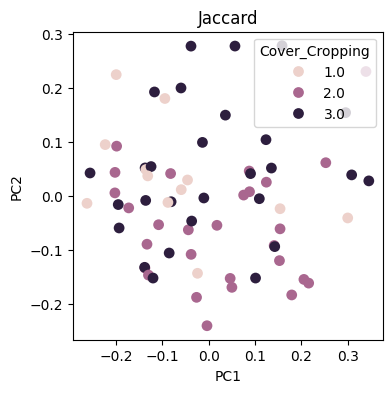

In [26]:
plt.figure(figsize=(4, 4)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=jaccard_pcoa_df_merged,
    hue='Cover_Cropping',
    s=60,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Jaccard')

plt.show()

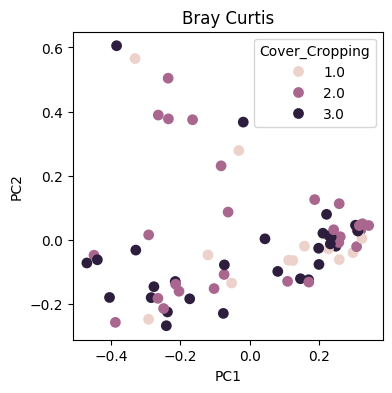

In [27]:
plt.figure(figsize=(4, 4)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=bc_pcoa_df_merged,
    hue='Cover_Cropping',
    s=60,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Bray Curtis')

plt.show()

## Kmerizer 

In [29]:
#!rm -r kmer-core-metrics

In [28]:
%%bash

qiime kmerizer core-metrics \
    --i-sequences valais_water_stress_rep_seqs.qza \
    --i-table valais_Cover_Cropping_table.qza \
    --p-sampling-depth 10000 \
    --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
    --p-n-jobs 'auto' \
    --output-dir valais_Cover_Cropping_kmer_cm10000/

Saved FeatureTable[Frequency] to: valais_Cover_Cropping_kmer_cm10000/rarefied_table.qza
Saved FeatureTable[Frequency] to: valais_Cover_Cropping_kmer_cm10000/kmer_table.qza
Saved SampleData[AlphaDiversity] to: valais_Cover_Cropping_kmer_cm10000/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: valais_Cover_Cropping_kmer_cm10000/shannon_vector.qza
Saved DistanceMatrix to: valais_Cover_Cropping_kmer_cm10000/jaccard_distance_matrix.qza
Saved DistanceMatrix to: valais_Cover_Cropping_kmer_cm10000/bray_curtis_distance_matrix.qza
Saved PCoAResults to: valais_Cover_Cropping_kmer_cm10000/jaccard_pcoa_results.qza
Saved PCoAResults to: valais_Cover_Cropping_kmer_cm10000/bray_curtis_pcoa_results.qza
Saved Visualization to: valais_Cover_Cropping_kmer_cm10000/scatterplot.qzv


In [29]:
Visualization.load('valais_Cover_Cropping_kmer_cm10000/scatterplot.qzv')

<visualization: Visualization uuid: c6bf968d-4bbf-468e-b8be-0125ded81d0f>

In [30]:
!qiime tools export --input-path valais_Cover_Cropping_kmer_cm10000/jaccard_pcoa_results.qza --output-path valais_Cover_Cropping_kmer_cm10000/jaccard_pcoa
!qiime tools export --input-path valais_Cover_Cropping_kmer_cm10000/bray_curtis_pcoa_results.qza --output-path valais_Cover_Cropping_kmer_cm10000/bray_curtis_pcoa


# reimport 
bc_pcoa = pd.read_csv('valais_Cover_Cropping_kmer_cm10000/bray_curtis_pcoa/ordination.txt', sep='\t', skiprows=9, header=None)
jaccard_pcoa = pd.read_csv('valais_Cover_Cropping_kmer_cm10000/jaccard_pcoa/ordination.txt', sep='\t', skiprows=9, header=None)

# function to get components 
def select_components(df):
    # Drop the last 2 rows
    df = df.iloc[:-2]
    # Select specific columns
    df = df.iloc[:, [0, 1, 2]]
    # Rename columns and set index
    df = df.rename(columns={0: 'ID', 1: 'PC1', 2: 'PC2'}).set_index('ID')
    return df

bc_pcoa_df = select_components(bc_pcoa)
jaccard_pcoa_df = select_components(jaccard_pcoa)

Exported valais_Cover_Cropping_kmer_cm10000/jaccard_pcoa_results.qza as OrdinationDirectoryFormat to directory valais_Cover_Cropping_kmer_cm10000/jaccard_pcoa
Exported valais_Cover_Cropping_kmer_cm10000/bray_curtis_pcoa_results.qza as OrdinationDirectoryFormat to directory valais_Cover_Cropping_kmer_cm10000/bray_curtis_pcoa


In [31]:
md = pd.read_csv('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv', sep='\t', index_col=0)

# merge with metadata
bc_pcoa_df_merged = bc_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')
jaccard_pcoa_df_merged = jaccard_pcoa_df.merge(md, left_on='ID', right_on='id', how='left')

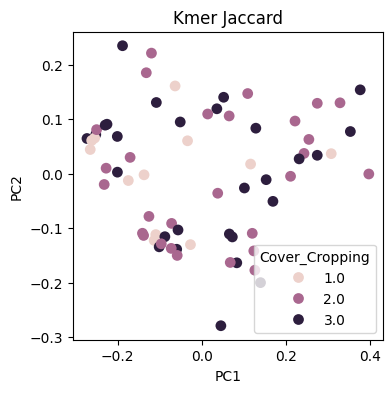

In [32]:
plt.figure(figsize=(4, 4)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=jaccard_pcoa_df_merged,
    hue='Cover_Cropping',
    s=60,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kmer Jaccard')

plt.show()

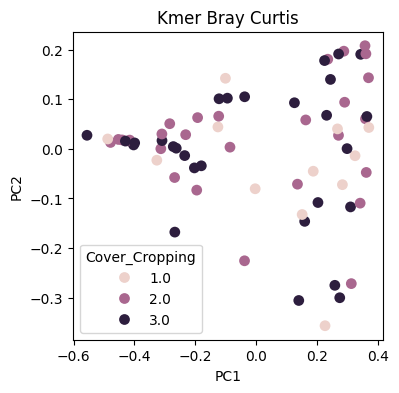

In [33]:
plt.figure(figsize=(4, 4)) 
sns.scatterplot(
    x='PC1', y='PC2',
    data=bc_pcoa_df_merged,
    hue='Cover_Cropping',
    s=60,edgecolor='none')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Kmer Bray Curtis')

plt.show()

# PERMANOVA

In [53]:
md.to_dataframe()

SAMPLE_NAME    Domaine  \
id                                                                       
364525_483-LP3-ITS-0483                            Valais_2  réseau VS   
364525_484-LP3-ITS-0484                           Valais_33  réseau VS   
364525_485-LP3-ITS-0485                           Valais_26  réseau VS   
364525_486-LP3-ITS-0486                           Valais_22  réseau VS   
364525_481-LP3-ITS-0481                            Valais_7  réseau VS   
...                                                     ...        ...   
364526_249-LP3-ITS-0825  Lavaux_2023-09-20_must_Plot17_RepA        NaN   
364526_230-LP3-ITS-0806  Lavaux_2023-09-20_must_Plot17_RepB        NaN   
364526_225-LP3-ITS-0801  Lavaux_2023-09-20_must_Plot17_RepC        NaN   
364526_227-LP3-ITS-0803  Lavaux_2023-09-20_must_Plot17_RepD        NaN   
364526_247-LP3-ITS-0823  Lavaux_2023-09-20_must_Plot17_RepE        NaN   

                              Plot  N-tester_beginning_August  Fertility  \
id                                                                         
364525_483-LP3-ITS-0483     Evou_2                      444.0   0.846774   
364525_484-LP3-ITS-0484   Vétroz_4                      469.0   1.181034   
364525_485-LP3-ITS-0485   Chamos_1                      624.0   1.756757   
364525_486-LP3-ITS-0486  Leytron_1                      566.0   1.427481   
364525_481-LP3-ITS-0481     Mart_4                      408.0   1.640288   
...                            ...                        ...        ...   
364526_249-LP3-ITS-0825         17                        NaN        NaN   
364526_230-LP3-ITS-0806         17                        NaN        NaN   
364526_225-LP3-ITS-0801         17                        NaN        NaN   
364526_227-LP3-ITS-0803         17                        NaN        NaN   
364526_247-LP3-ITS-0823         17                        NaN        NaN   

                         Cover_Cropping  07.Jun  27.Jun  17.Jul  09.Aug  ...  \
id                                                                       ...   
364525_483-LP3-ITS-0483             3.0     NaN     NaN     NaN    -1.1  ...   
364525_484-LP3-ITS-0484             2.0     NaN     NaN     NaN    -4.0  ...   
364525_485-LP3-ITS-0485             3.0     NaN     NaN     NaN    -3.5  ...   
364525_486-LP3-ITS-0486             1.0     NaN     NaN     NaN    -5.4  ...   
364525_481-LP3-ITS-0481             3.0     NaN     NaN     NaN    -1.9  ...   
...                                 ...     ...     ...     ...     ...  ...   
364526_249-LP3-ITS-0825             NaN     NaN     NaN     NaN     NaN  ...   
364526_230-LP3-ITS-0806             NaN     NaN     NaN     NaN     NaN  ...   
364526_225-LP3-ITS-0801             NaN     NaN     NaN     NaN     NaN  ...   
364526_227-LP3-ITS-0803             NaN     NaN     NaN     NaN     NaN  ...   
364526_247-LP3-ITS-0823             NaN     NaN     NaN     NaN     NaN  ...   

                         GEOL  Soil_type       Soil_depth       Precipitation  \
id                                                                              
364525_483-LP3-ITS-0483  62.0   Calcaire        above_150  RU faible, <100 mm   
364525_484-LP3-ITS-0484  47.0   Calcaire  variable_40-150  RU faible, <100 mm   
364525_485-LP3-ITS-0485  69.0   Calcaire        above_150  RU grande, >150 mm   
364525_486-LP3-ITS-0486  69.0   Calcaire        above_150  RU grande, >150 mm   
364525_481-LP3-ITS-0481  82.0   Calcaire        above_150  RU grande, >150 mm   
...                       ...        ...              ...                 ...   
364526_249-LP3-ITS-0825   NaN   Calcaire           40-100                 NaN   
364526_230-LP3-ITS-0806   NaN   Calcaire           40-100                 NaN   
364526_225-LP3-ITS-0801   NaN   Calcaire           40-100                 NaN   
364526_227-LP3-ITS-0803   NaN   Calcaire           40-100                 NaN   
364526_247-LP3-ITS-0823   NaN   Calcaire           40-100                 NaN   

 

In [59]:
md = Metadata.load('/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv')

formula = 'CC_Cat'

beta_metrics = ['bray_curtis', 'jaccard']

# PERMANOVA with core metrics 
for m in beta_metrics:
    adonis_res, = q2d.actions.adonis(
        distance_matrix=core_div_dict[m + '_distance_matrix'],
        metadata=md,
        formula=formula,
        n_jobs=3)
    adonis_res.save(output_dir + 'adonis_{0}.qzv'.format(m))
    
# PERMANOVA with kmer core metrics 
kmer_dir = 'valais_Cover_Cropping_kmer_cm10000'
    
for m in beta_metrics:
    !qiime diversity adonis \
        --i-distance-matrix "{kmer_dir}/{m}_distance_matrix.qza" \
        --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
        --p-formula "{formula}" \
        --p-n-jobs 5 \
        --o-visualization "{kmer_dir}/adonis_{m}.qzv"

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmpdiayoics/dm.tsv /scratch/lfloerl/tmpdata/tmpdiayoics/md.tsv CC_Cat 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-2uarp2y1/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  series[missing.index] = missing
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/qiime2/metadata/metadata.py:610: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future v

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /scratch/lfloerl/tmpdata/tmp363tciiw/dm.tsv /scratch/lfloerl/tmpdata/tmp363tciiw/md.tsv CC_Cat 999 3 /scratch/lfloerl/tmpdata/qiime2-temp-ikqzcnxu/adonis.tsv

R version 4.3.3 (2024-02-29) 


Lade nötiges Paket: permute
Lade nötiges Paket: lattice
This is vegan 2.6-8
Warnmeldung:
'adonis' ist veraltet.
Benutzen Sie stattdessen 'adonis2'
Siehe help("Deprecated") und help("vegan-deprecated"). 


Saved Visualization to: valais_Cover_Cropping_kmer_cm10000/adonis_bray_curtis.qzv
Saved Visualization to: valais_Cover_Cropping_kmer_cm10000/adonis_jaccard.qzv


In [60]:
Visualization.load(f'{output_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: d0f3150c-dd30-44f5-bedb-ae75b3616b09>

In [61]:
Visualization.load(f'{output_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: fe3f60a5-d64f-4b42-84c8-3321e6ceb846>

In [62]:
Visualization.load(f'{kmer_dir}/adonis_bray_curtis.qzv')

<visualization: Visualization uuid: e742f46e-7b2a-4171-87e8-4947fb50df09>

In [63]:
Visualization.load(f'{kmer_dir}/adonis_jaccard.qzv')

<visualization: Visualization uuid: 26e83fd7-3fa6-429f-b2ad-704dd7945c3a>

# Random Forest

pretty bad! 

In [64]:
%%bash 

#rm -r must-harvest21classify-NCV-plot

qiime sample-classifier classify-samples-ncv \
  --i-table valais_Cover_Cropping_table.qza \
  --m-metadata-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv \
  --m-metadata-column CC_Cat \
  --p-random-state 666 \
  --p-n-jobs 10 \
  --p-n-estimators 10000 \
  --output-dir ./classify-NCV-CoverCrops/
  

qiime sample-classifier confusion-matrix \
  --i-predictions classify-NCV-CoverCrops/predictions.qza \
  --i-probabilities classify-NCV-CoverCrops/probabilities.qza \
  --m-truth-file /home/lfloerl/microterroir/Microbiome/Metadata/ITS_Valais_and_Lavaux23.tsv  \
  --m-truth-column CC_Cat \
  --o-visualization classify-NCV-CoverCrops/ncv_confusion_matrix.qzv

Saved SampleData[ClassifierPredictions] to: ./classify-NCV-CoverCrops/predictions.qza
Saved FeatureData[Importance] to: ./classify-NCV-CoverCrops/feature_importance.qza
Saved SampleData[Probabilities] to: ./classify-NCV-CoverCrops/probabilities.qza
Saved Visualization to: classify-NCV-CoverCrops/ncv_confusion_matrix.qzv


In [65]:
Visualization.load('classify-NCV-CoverCrops/ncv_confusion_matrix.qzv')

<visualization: Visualization uuid: c11d47cd-8184-4693-b0f5-e17729554afe>

# ANCOM 

In [69]:
# none for disease manamgenent 
filtered_table, = filter_features(table, min_frequency = 5, min_samples = 1)
ancom_table, = add_pseudocount(filtered_table)
ancom = ancom(table=ancom_table, metadata=md.get_column('CC_Cat'))
ancom.visualization

/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/scratch/lfloerl/.condaenvs/qiime2-amplicon-2024.10/lib/python3.10/site-packages/q2_composition/_ancom.py:103: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<visualization: Visualization uuid: 7fd0f38b-f820-4df1-aded-636db737c2ea>